📦 Step 1: Import Libraries & Setup Environment
This section imports all the essential libraries for:

Accessing datasets via the Kaggle API
Managing file paths and directories with pathlib and os
Performing file operations like copying and deleting with shutil
Reading and manipulating tabular data using pandas

In [3]:
from kaggle.api.kaggle_api_extended import KaggleApi
from pathlib import Path
import shutil
import pandas as pd
import os

📦 Step 2: Define Dataset Information & Paths
This section sets up key variables for the project:

dataset_id: Specifies the unique identifier for the dataset on Kaggle (gpiosenka/cards-image-datasetclassification).
download_path: Defines a temporary directory (temp_cards_dataset) using Path to store the downloaded dataset locally.

In [4]:
# Dataset info
dataset_id = "gpiosenka/cards-image-datasetclassification"

# Temporary download path
download_path = Path("temp_cards_dataset")


📦 Step 3: Authenticate & Download Dataset
This section handles the authentication and downloading of the dataset:

Initializes the Kaggle API client with KaggleApi() and authenticates using stored credentials.
Downloads the dataset specified by dataset_id and extracts it into the directory defined by download_path.
Prints a confirmation message once the dataset is successfully downloaded and extracted.

In [ ]:
api = KaggleApi()
api.authenticate()

# Download and unzip into our chosen folder
api.dataset_download_files(dataset_id, path=download_path, unzip=True)

print("Dataset downloaded and extracted into:", download_path)

Dataset URL: https://www.kaggle.com/datasets/gpiosenka/cards-image-datasetclassification
✅ Dataset downloaded and extracted into: temp_cards_dataset


 Step 4: Explore Downloaded Dataset
This section lists all the items in the downloaded dataset folder:

Iterates through the contents of the download_path directory using Path.iterdir().
Prints the name of each item (file or folder) in the dataset directory, prefixed with a folder icon (📁).

In [6]:
# List all items inside the dataset folder
for item in download_path.iterdir():
    print("📁", item.name)


📁 valid
📁 53cards-53-(200 X 200)-100.00.h5
📁 test
📁 cards.csv
📁 train
📁 14card types-14-(200 X 200)-94.61.h5


📦 Step 5: Verify Dataset Structure
This section verifies the existence of key components in the downloaded dataset:

Checks if the cards.csv file exists in the download_path directory and prints a confirmation (📄 CSV found: True/False).
Checks if the train folder exists in the download_path directory and prints a confirmation (📁 Train folder found: True/False).

In [7]:
# Check if cards.csv exists
csv_path = download_path / "cards.csv"
print("📄 CSV found:", csv_path.exists())

# Check if train folder exists
train_path = download_path / "train"
print("📁 Train folder found:", train_path.exists())


📄 CSV found: True
📁 Train folder found: True


📄 Step 6: Load and Inspect Metadata (CSV)
In this step, we read the cards.csv file that contains metadata for all images. This includes:

Filepaths to each card image
Class labels and card types
Dataset split (train, valid, test)
We preview the first few rows and print the column names for understanding the structure.

In [8]:
csv_path = download_path / "cards.csv"

df = pd.read_csv(csv_path)
print("📄 CSV Preview:")
print(df.head())
print("\n📊 Column names:", df.columns.tolist())

📄 CSV Preview:
   class index                   filepaths        labels card type data set
0            0  train/ace of clubs/001.jpg  ace of clubs       ace    train
1            0  train/ace of clubs/002.jpg  ace of clubs       ace    train
2            0  train/ace of clubs/003.jpg  ace of clubs       ace    train
3            0  train/ace of clubs/004.jpg  ace of clubs       ace    train
4            0  train/ace of clubs/005.jpg  ace of clubs       ace    train

📊 Column names: ['class index', 'filepaths', 'labels', 'card type', 'data set']


🖼️ Step 7: Preview Sample Images with Labels
This step randomly selects a few image paths from the cards.csv file and visualizes them with their corresponding labels. It helps verify:

The file structure is correct
Labels match the visual content
The dataset is loaded properly

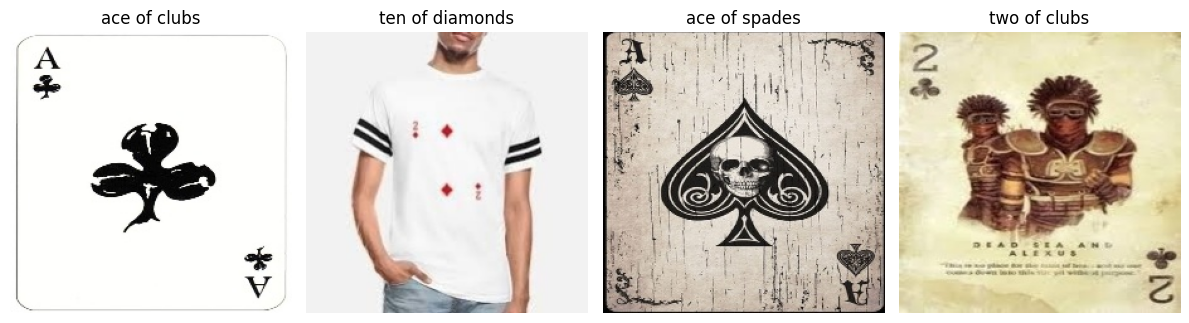

In [9]:
from PIL import Image
import matplotlib.pyplot as plt

# Select a few rows from the DataFrame
sample_rows = df.sample(4)

# Plot each image
plt.figure(figsize=(12, 6))

for i, row in enumerate(sample_rows.itertuples()):
    image_path = download_path / row.filepaths  # full path to image
    image = Image.open(image_path)

    plt.subplot(1, 4, i+1)
    plt.imshow(image)
    plt.title(row.labels)
    plt.axis('off')

plt.tight_layout()
plt.show()


📊 Step 8: Visualize Real Class Distribution in the Train Folder
Instead of relying on the CSV file alone, this step directly analyzes the file system to count how many .jpg images are present per class in the train/ directory.

This ensures:

All image files actually exist
No class is significantly over- or under-represented
Distribution is ready for modeling
A bar chart is generated showing how many samples are available for each card class.

/var/folders/sw/fn_pb3g10j55689swj6kkmch0000gn/T/ipykernel_32262/1083847372.py:28: UserWarning: Glyph 128194 (\N{OPEN FILE FOLDER}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128194 (\N{OPEN FILE FOLDER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


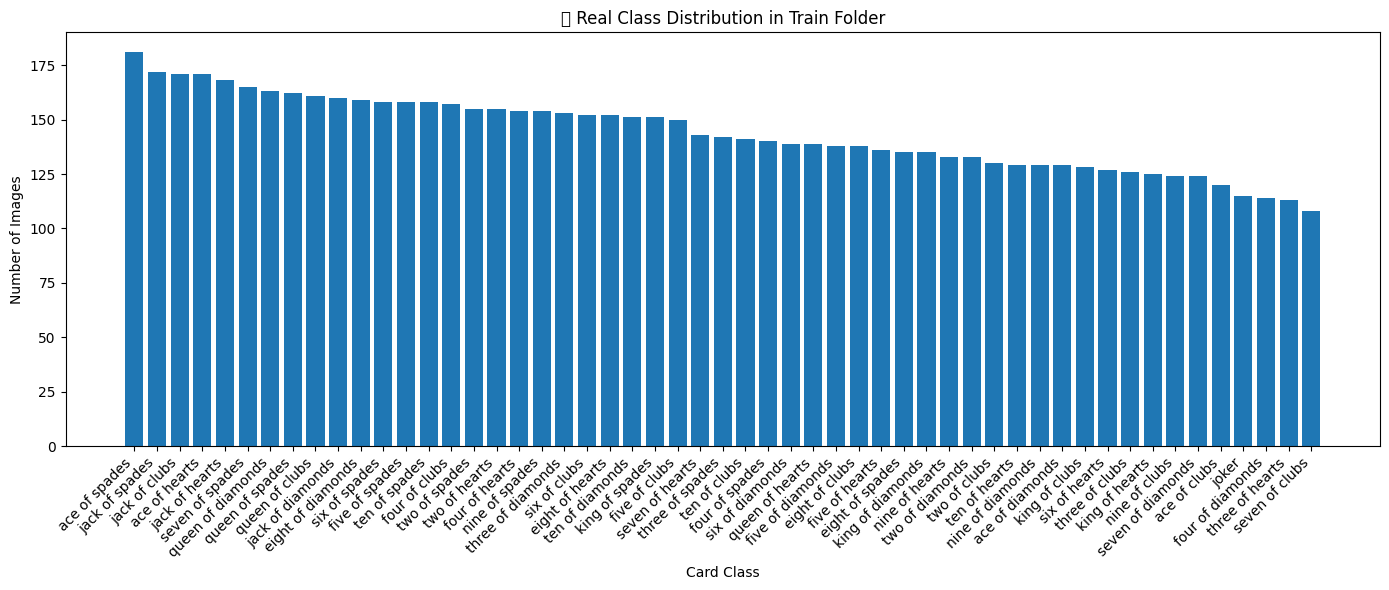

In [10]:
import os
from pathlib import Path
import matplotlib.pyplot as plt

# Path to the real train folder
train_path = download_path / "train"

# Dictionary to store image counts per class
class_counts = {}

# Loop through each class folder
for class_folder in train_path.iterdir():
    if class_folder.is_dir():
        class_name = class_folder.name
        image_files = list(class_folder.glob("*.jpg"))
        class_counts[class_name] = len(image_files)

# Convert to sorted list of tuples
sorted_counts = dict(sorted(class_counts.items(), key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(14, 6))
plt.bar(sorted_counts.keys(), sorted_counts.values())
plt.xticks(rotation=45, ha='right')
plt.title("📂 Real Class Distribution in Train Folder")
plt.ylabel("Number of Images")
plt.xlabel("Card Class")
plt.tight_layout()
plt.show()


🍩 Step 9: Donut Chart of Class Distribution in Validation and Test Sets
This step analyzes the valid/ and test/ folders directly to count the number of images in each class and visualize the distribution as donut-style pie charts.

Why this matters:

Ensures balance across datasets
Verifies class folders are correctly structured
Helps identify underrepresented classes before evaluation

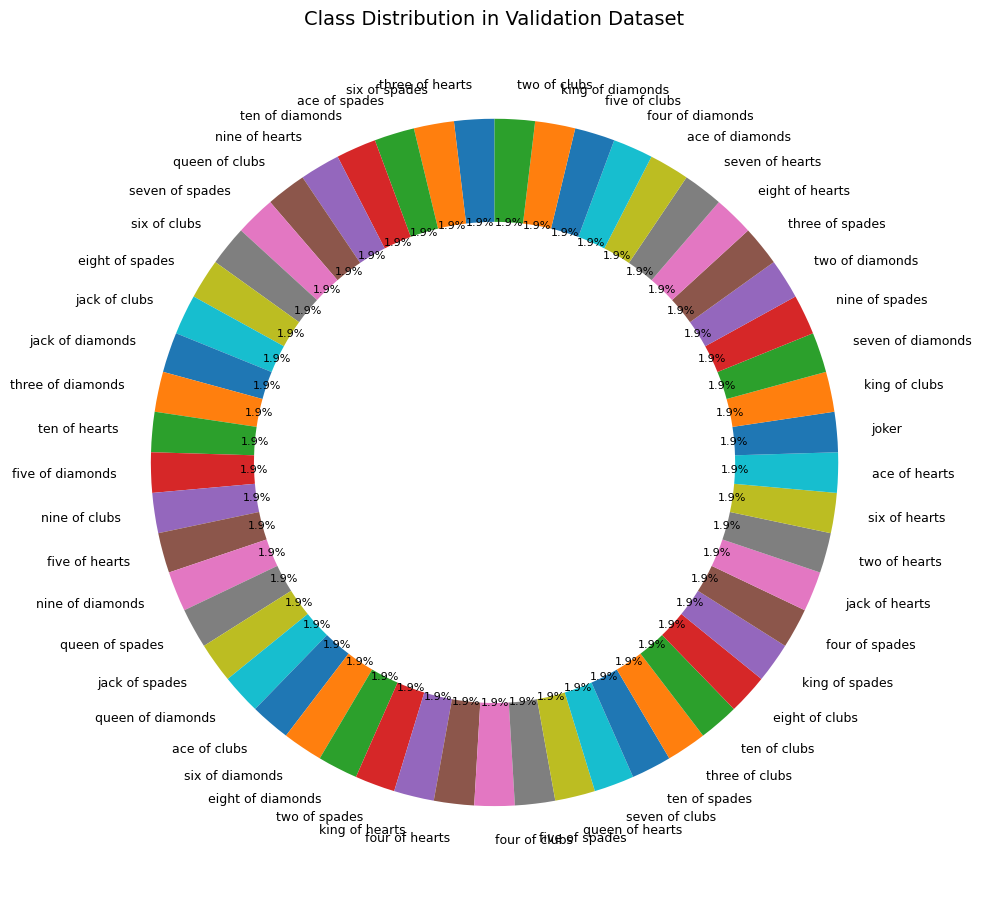

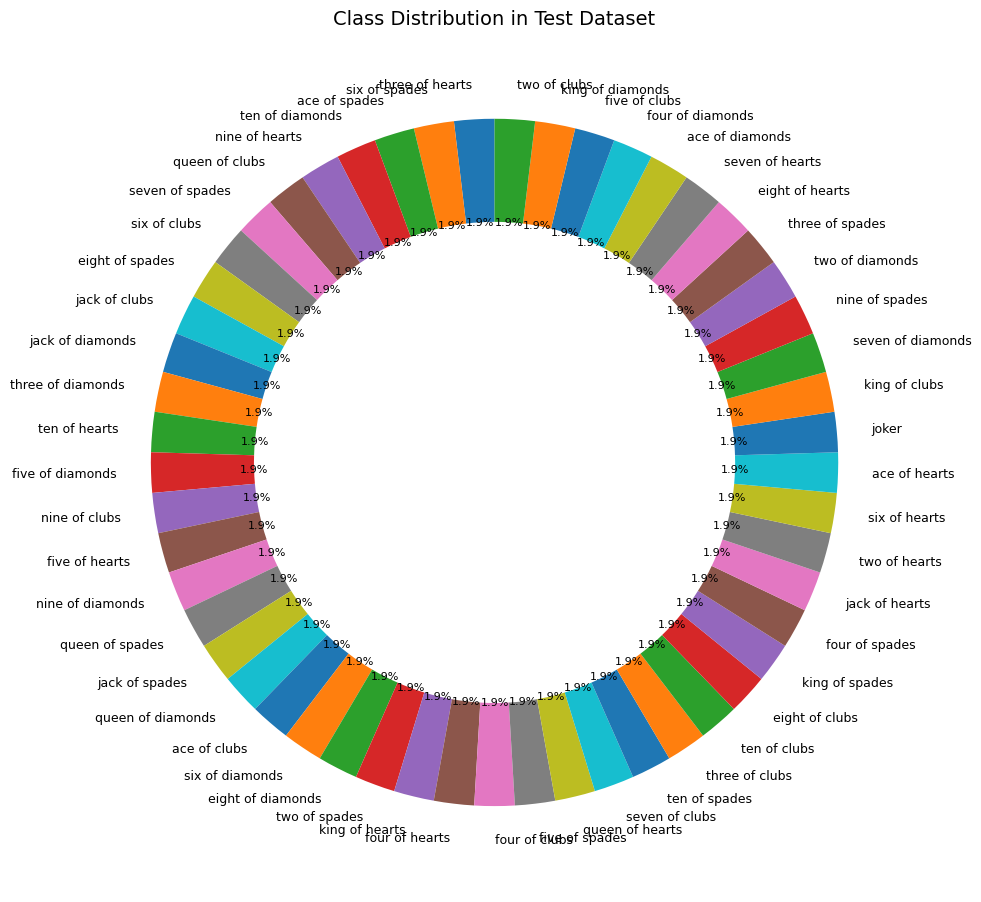

In [12]:
import matplotlib.pyplot as plt
from pathlib import Path

def plot_class_distribution(folder_path: Path, dataset_name: str):
    class_counts = {}

    for class_folder in folder_path.iterdir():
        if class_folder.is_dir():
            class_name = class_folder.name
            image_files = list(class_folder.glob("*.jpg"))
            class_counts[class_name] = len(image_files)

    # Data
    labels = list(class_counts.keys())
    sizes = list(class_counts.values())
    total = sum(sizes)
    percentages = [f"{(count/total)*100:.1f}%" for count in sizes]

    # Plot
    fig, ax = plt.subplots(figsize=(10, 10))
    wedges, texts = ax.pie(sizes, labels=labels, startangle=90, wedgeprops=dict(width=0.3))
    plt.setp(texts, size=9)

    # Add percentage labels inside
    for i, w in enumerate(wedges):
        angle = (w.theta2 - w.theta1)/2. + w.theta1
        x = 0.7 * np.cos(np.deg2rad(angle))
        y = 0.7 * np.sin(np.deg2rad(angle))
        ax.text(x, y, f"{percentages[i]}", ha='center', va='center', fontsize=8)

    ax.set_title(f"Class Distribution in {dataset_name} Dataset", fontsize=14)
    plt.tight_layout()
    plt.show()

# Paths
val_path = download_path / "valid"
test_path = download_path / "test"

# 🔁 Call for both validation and test sets
plot_class_distribution(val_path, "Validation")
plot_class_distribution(test_path, "Test")


📂 Step 10: Load and Optimize Training, Validation, and Test Datasets
This section uses image_dataset_from_directory to efficiently load and preprocess the dataset into TensorFlow tf.data.Dataset objects. It also applies performance optimizations like caching and prefetching.

✅ Key features of this block:

Loads images with size (200, 200)
Applies shuffling only to the training set
Uses .cache() and .prefetch() for faster data streaming
Captures class names from the dataset directory structure

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

img_size = (200, 200)
batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

# Step 1: Load datasets
train_ds = tf.keras.utils.image_dataset_from_directory(
    download_path / "train",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    download_path / "valid",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    download_path / "test",
    image_size=img_size,
    batch_size=batch_size,
    shuffle=False
)

class_names = train_ds.class_names

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)



Found 7624 files belonging to 53 classes.
Found 265 files belonging to 53 classes.
Found 265 files belonging to 53 classes.


🧪 Step 11: Inspect One Batch of Training Data
Before training the model, we take one batch from the training dataset to inspect its structure. This helps confirm:

Batch shape is as expected (e.g., (32, 200, 200, 3))
Labels are correctly assigned
The pipeline is working

In [15]:
for images, labels in train_ds.take(1):
    print("✅ Batch shape:", images.shape)
    print("🧠 Labels:", labels.numpy())


✅ Batch shape: (32, 200, 200, 3)
🧠 Labels: [31 29 23  8 35  1 34 21  4  5  1 41 17 40 28 16 11 15 13 20 23 42 27 52
  3 10 43 10 39 40 29  3]


2025-04-11 10:41:42.816627: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


🖼️ Step 12: Visualize One Full Training Batch with Labels
This section takes a full batch of training images and displays them in a clean grid format (4 rows × 8 columns), with class names shown as titles. It helps verify:

Images are correctly loaded and shaped
Labels match expectations
Class distribution looks reasonable visually

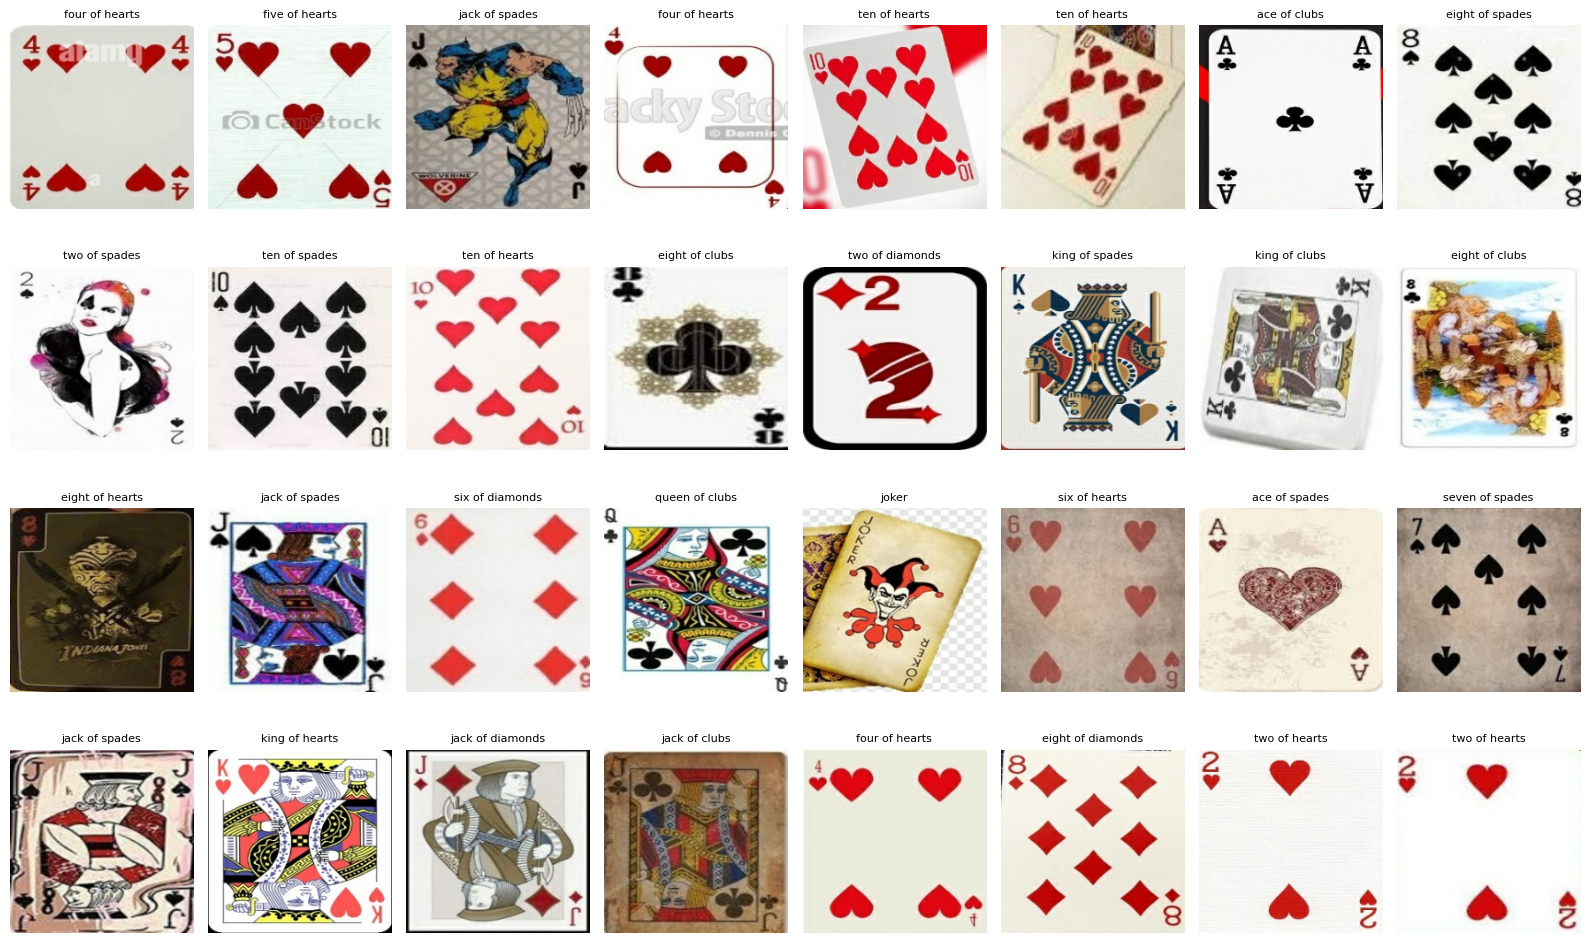

2025-04-11 10:41:47.666079: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [16]:
import matplotlib.pyplot as plt

# Get class names from the dataset
class_names = train_ds.class_names

# Take one batch of images and labels
for images, labels in train_ds.take(1):
    plt.figure(figsize=(16, 10))  # Adjust size for a clean 4x8 grid

    for i in range(len(images)):
        ax = plt.subplot(4, 8, i + 1)  # 4 rows × 8 columns
        plt.imshow(images[i].numpy().astype("uint8"))  # Convert tensor to image
        label_index = labels[i].numpy()
        plt.title(class_names[label_index], fontsize=8)
        plt.axis("off")

    plt.tight_layout()
    plt.show()


🔖 Step 13: Print Class Names for Each Sample in a Batch
This step loops through one batch of training data and prints the class name for each image. It’s a helpful tool to:

Understand which classes are represented in each batch
Confirm that labels are mapping correctly to folder-based class names

In [17]:
class_names = train_ds.class_names

for images, labels in train_ds.take(1):
    for i in range(len(labels)):
        label_index = labels[i].numpy()
        print(f"{i+1}. {class_names[label_index]}")


1. ace of spades
2. ace of clubs
3. jack of clubs
4. eight of hearts
5. five of hearts
6. two of diamonds
7. six of diamonds
8. eight of diamonds
9. ace of hearts
10. nine of hearts
11. queen of clubs
12. nine of diamonds
13. joker
14. nine of hearts
15. five of hearts
16. king of hearts
17. two of spades
18. nine of diamonds
19. queen of spades
20. nine of spades
21. king of spades
22. ace of spades
23. five of clubs
24. four of diamonds
25. four of spades
26. five of hearts
27. five of diamonds
28. two of clubs
29. joker
30. ace of clubs
31. king of spades
32. ten of diamonds


2025-04-11 10:43:59.283392: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


🔁 Step 14: Define Data Augmentation Pipeline
To improve generalization and prevent overfitting, we apply real-time data augmentation using Keras's built-in preprocessing layers.

This pipeline includes:

Random horizontal flipping
Slight random rotations
Light zooming
These transformations simulate image variability, helping the model learn more robust features from fewer examples.

In [18]:
from tensorflow.keras import layers

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
], name="data_augmentation")


🌀 Step 15: Preview Augmented Training Images
This step visualizes how the data augmentation pipeline modifies training images on the fly. It applies the augmentation to a single batch and displays 8 randomly transformed images with their class labels.

This preview helps confirm:

Augmentations are applied correctly
Labels remain intact after transformation
Variability is realistic and useful

/var/folders/sw/fn_pb3g10j55689swj6kkmch0000gn/T/ipykernel_32262/4135780954.py:11: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127744 (\N{CYCLONE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


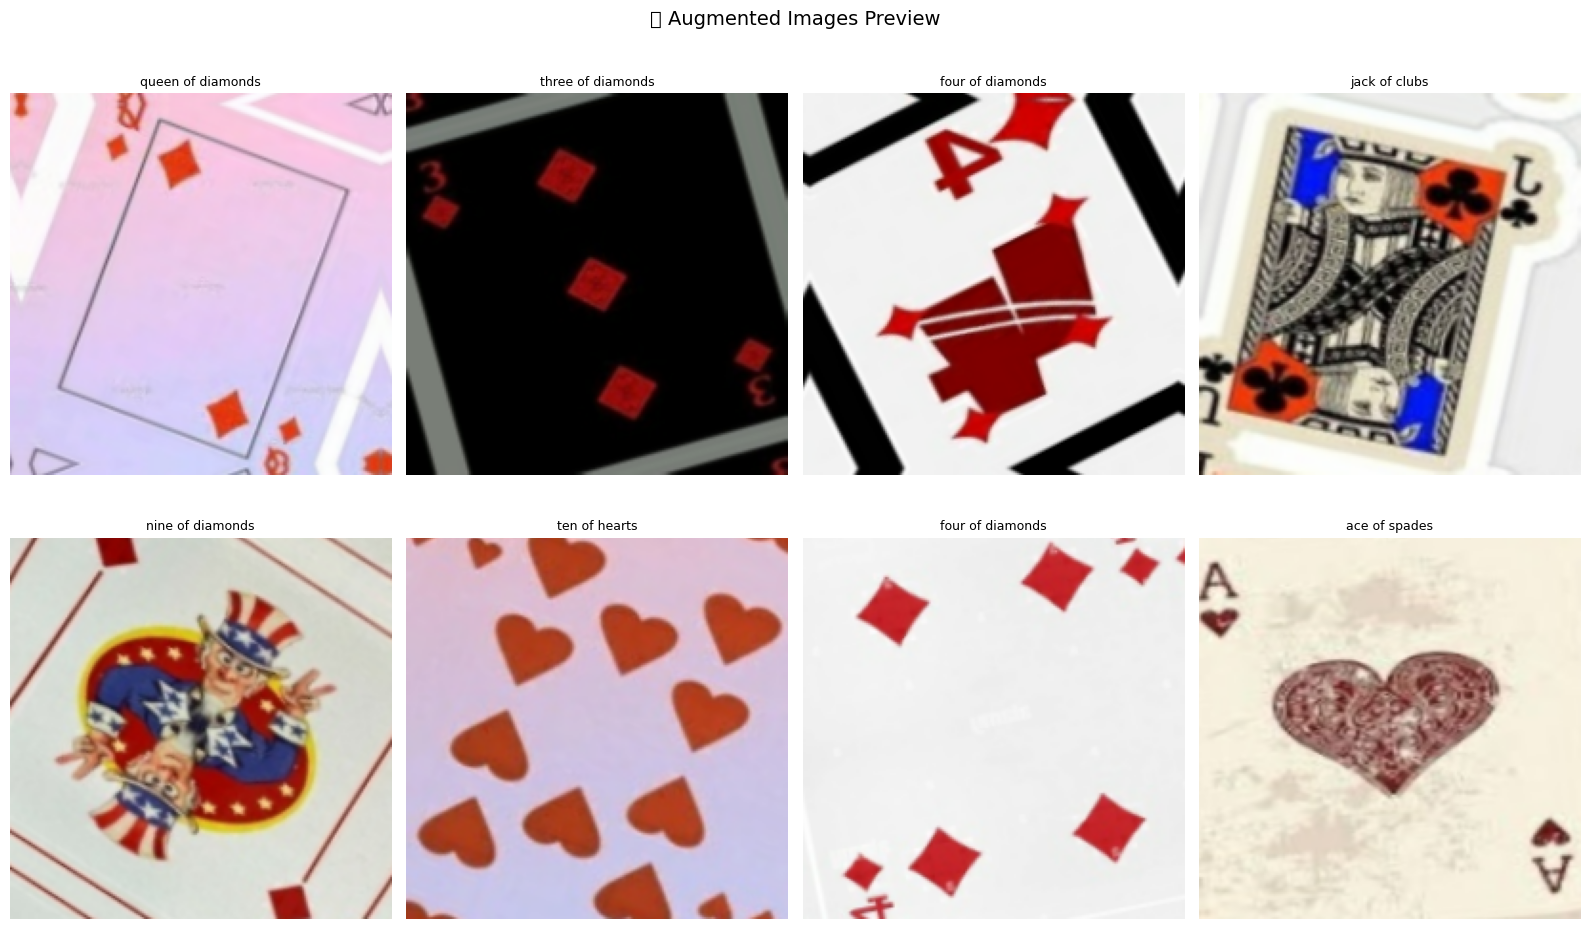

2025-04-11 10:45:21.757248: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [19]:
for images, labels in train_ds.take(1):
    augmented_images = data_augmentation(images)

    plt.figure(figsize=(16, 10))
    for i in range(8):
        ax = plt.subplot(2, 4, i + 1)
        plt.imshow(augmented_images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i].numpy()], fontsize=9)
        plt.axis("off")
    plt.suptitle("🌀 Augmented Images Preview", fontsize=14)
    plt.tight_layout()
    plt.show()


🚀 Step 16: Optimize Dataset Performance with cache() and prefetch()
To ensure fast and efficient training, we apply TensorFlow’s input pipeline optimizations:

cache(): Stores the dataset in memory after the first epoch (if it fits), or in a local file
shuffle(1000): Randomizes training samples within a buffer of 1000
prefetch(): Overlaps data loading with model execution to minimize training latency

In [20]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


🧱 Step 17: Build a Custom CNN Model (Baseline)
This block defines a custom Convolutional Neural Network (CNN) using Keras's Sequential API. It includes:

✅ Data augmentation directly in the model
✅ Rescaling of pixel values to [0, 1]
📦 Three Conv2D + MaxPooling blocks for feature extraction
🧠 Dropout for regularization
🎯 Softmax output layer for multiclass classification

In [21]:
from tensorflow import keras
from tensorflow.keras import layers

num_classes = len(class_names)

model = keras.Sequential([
    layers.Input(shape=(200, 200, 3)),

    # ✅ Data Augmentation Layer
    data_augmentation,

    # ✅ Rescale pixel values (0–255 → 0–1)
    layers.Rescaling(1./255),

    # 🔧 Convolutional Layers
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.5),

    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


⚙️ Step 18: Compile the Model
We compile the CNN model with the following settings:

Optimizer: Adam — efficient and adaptive
Loss Function: sparse_categorical_crossentropy — used for integer-labeled multiclass classification
Metric: accuracy — for tracking model performance
Also, model.summary() is called to print the layer-wise structure and number of parameters.

In [22]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # We use integer labels
    metrics=['accuracy']
)
# Model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ data_augmentation (Sequential)  │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 200, 200, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 198, 198, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 99, 99, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 97, 97, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 46, 46, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 67712)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     8,667,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 53)             │         6,837 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,767,349 (33.44 MB)

 Trainable params: 8,767,349 (33.44 MB)

 Non-trainable params: 0 (0.00 B)

🛑 Step 19: Add EarlyStopping Callback
To avoid overfitting and unnecessary training, we use the EarlyStopping callback. It monitors the validation loss during training and stops when no improvement is seen for 3 consecutive epochs.

monitor='val_loss': Watch validation loss
patience=3: Allow 3 epochs without improvement
restore_best_weights=True: Reverts to the best model weights

In [23]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,            # Stop if val_loss doesn't improve for 3 epochs
    restore_best_weights=True
)


👟 Step 20: Train the Model
We now train the compiled CNN model using the prepared datasets. The training loop:

Runs up to 20 epochs
Uses train_ds for training and val_ds for validation
Applies the EarlyStopping callback to halt training if val_loss stops improving
Training history (loss + accuracy per epoch) is stored in the history object for later analysis.

In [24]:
epochs = 20

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 22s 83ms/step - accuracy: 0.0987 - loss: 4.0446 - val_accuracy: 0.2981 - val_loss: 2.8397
Epoch 2/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.2643 - loss: 2.9591 - val_accuracy: 0.3736 - val_loss: 3.1589
Epoch 3/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 23s 96ms/step - accuracy: 0.2949 - loss: 3.6047 - val_accuracy: 0.3132 - val_loss: 3.7533
Epoch 4/20
239/239 ━━━━━━━━━━━━━━━━━━━━ 24s 101ms/step - accuracy: 0.3077 - loss: 4.2086 - val_accuracy: 0.3472 - val_loss: 9.3725


The model began to learn in early epochs, but validation loss started increasing after a few rounds. As a result, the EarlyStopping callback stopped training at epoch 4 and restored the best weights from the lowest val_loss.

🔄 Step 21: Load Pretrained MobileNetV2 as Feature Extractor
To improve model performance and leverage prior knowledge, we switch from a custom CNN to transfer learning using MobileNetV2 — a lightweight and powerful architecture pretrained on ImageNet.

In this step, we:

Load MobileNetV2 without its top classification head (include_top=False)
Set trainable=False to freeze all pretrained layers during initial training

In [25]:
base_model = keras.applications.MobileNetV2(
    input_shape=(200, 200, 3),
    include_top=False,
    weights="imagenet"
)
base_model.trainable = False  # Freeze the base


/var/folders/sw/fn_pb3g10j55689swj6kkmch0000gn/T/ipykernel_32262/1986398516.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = keras.applications.MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


🧠 Step 22: Build the Transfer Learning Model
This step builds a custom classification model by stacking new layers on top of the frozen MobileNetV2 base.

It includes:

📸 Data augmentation + rescaling
📦 MobileNetV2 as a fixed feature extractor
🧱 A dense head tailored to the card classification task
🎯 A softmax layer for multiclass prediction

In [26]:
inputs = keras.Input(shape=(200, 200, 3))

# Apply your augmentation and scaling
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

# Feature extractor
x = base_model(x, training=False)

# Custom classification head
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation="relu")(x)
x = layers.Dropout(0.5)(x)
outputs = layers.Dense(len(class_names), activation="softmax")(x)

model = keras.Model(inputs, outputs)


⚙️ Step 23: Compile the Transfer Learning Model
We now compile the model with a custom Adam optimizer using a lower learning rate, which is ideal for fine-tuning.
We continue using sparse categorical crossentropy as the loss function, since our labels are integers (not one-hot encoded).

In [27]:
optimizer = keras.optimizers.Adam(learning_rate=1e-4)

model.compile(
    optimizer=optimizer,
    loss="sparse_categorical_crossentropy",  # You're using integer labels
    metrics=["accuracy"]
)


📉 Step 24: Add Learning Rate Scheduling and Callbacks
This step configures multiple callbacks to make training more efficient and adaptive:

📉 ExponentialDecay:
Gradually reduces learning rate every few steps
Slows learning as the model improves
🔁 ReduceLROnPlateau:
Cuts learning rate in half if val_loss plateaus
Helps escape local minima
🛑 EarlyStopping:
Stops training if val_loss doesn't improve for 3 epochs
Restores the best weights automatically

In [28]:
initial_learning_rate = 1e-4
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=478,
    decay_rate=0.9,
    staircase=True
)

lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: float(lr_schedule(epoch)))

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss", factor=0.5, patience=3, min_lr=1e-6, verbose=1
)

early_stopping = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=3, restore_best_weights=True, verbose=1
)


👟 Step 25: Train the Transfer Learning Model
We now train the model for up to 50 epochs, using the MobileNetV2 base + custom head, and all the callbacks defined earlier. The model is trained on the train_ds and validated against val_ds.

The following callbacks are active:

📉 LearningRateScheduler
🔁 ReduceLROnPlateau
🛑 EarlyStopping

In [29]:
epochs = 50

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[lr_scheduler, reduce_lr, early_stopping]
)


Epoch 1/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 25s 90ms/step - accuracy: 0.0399 - loss: 4.8441 - val_accuracy: 0.1472 - val_loss: 3.1930 - learning_rate: 1.0000e-04
Epoch 2/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.1065 - loss: 3.9655 - val_accuracy: 0.2075 - val_loss: 2.6869 - learning_rate: 1.0000e-04
Epoch 3/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.1658 - loss: 3.5615 - val_accuracy: 0.2792 - val_loss: 2.4331 - learning_rate: 1.0000e-04
Epoch 4/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 19s 77ms/step - accuracy: 0.1886 - loss: 3.3201 - val_accuracy: 0.3396 - val_loss: 2.2834 - learning_rate: 1.0000e-04
Epoch 5/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.2128 - loss: 3.1268 - val_accuracy: 0.3585 - val_loss: 2.1468 - learning_rate: 1.0000e-04
Epoch 6/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/step - accuracy: 0.2383 - loss: 2.9339 - val_accuracy: 0.3774 - val_loss: 2.0789 - learning_rate: 1.0000e-04
Epoch 7/50
239/239 ━━━━━━━━━━━━━━━━━━━━ 19s 78ms/ste

In [30]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc:.2%}, Test Loss: {test_loss:.4f}")


9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5435 - loss: 1.5698
Test Accuracy: 47.17%, Test Loss: 1.7946


📈 Step 26: Visualize Training and Validation Metrics
This step plots the training and validation accuracy and loss over time to help assess the model's learning behavior. It allows you to:

Spot overfitting or underfitting
See how well the model generalizes
Evaluate the impact of callbacks and scheduling

/var/folders/sw/fn_pb3g10j55689swj6kkmch0000gn/T/ipykernel_32262/2625179407.py:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  plt.tight_layout()
/var/folders/sw/fn_pb3g10j55689swj6kkmch0000gn/T/ipykernel_32262/2625179407.py:22: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  plt.tight_layout()
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


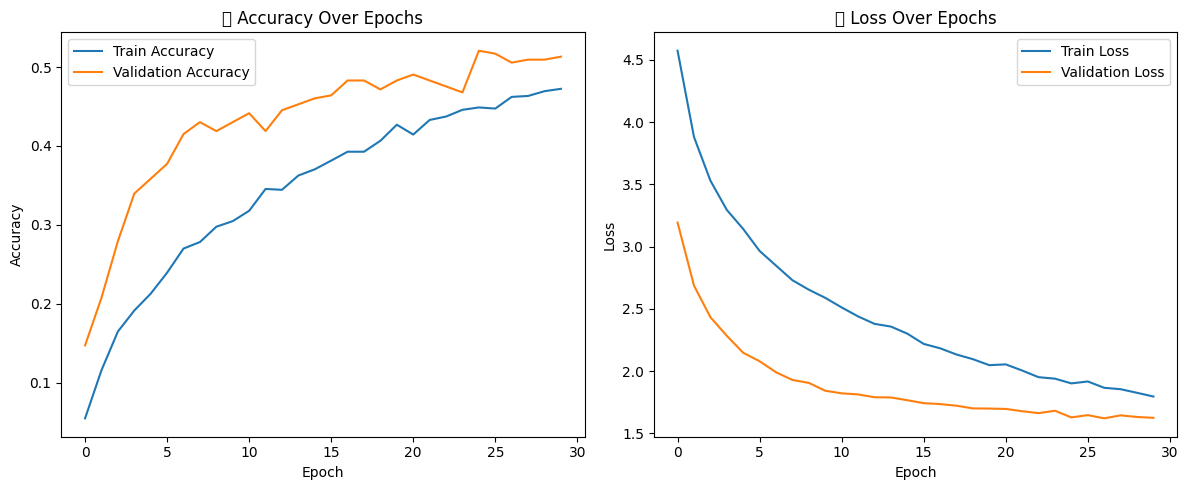

In [ ]:
# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("📈 Accuracy Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("📉 Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

🎯 Step 27: Visualize Model Predictions on Test Set
This section takes one batch of test images, runs them through the trained model, and compares the predicted class to the true label. Each image is shown with:

✅ Green title if prediction is correct
❌ Red title if prediction is incorrect

2025-04-11 11:59:53.265932: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


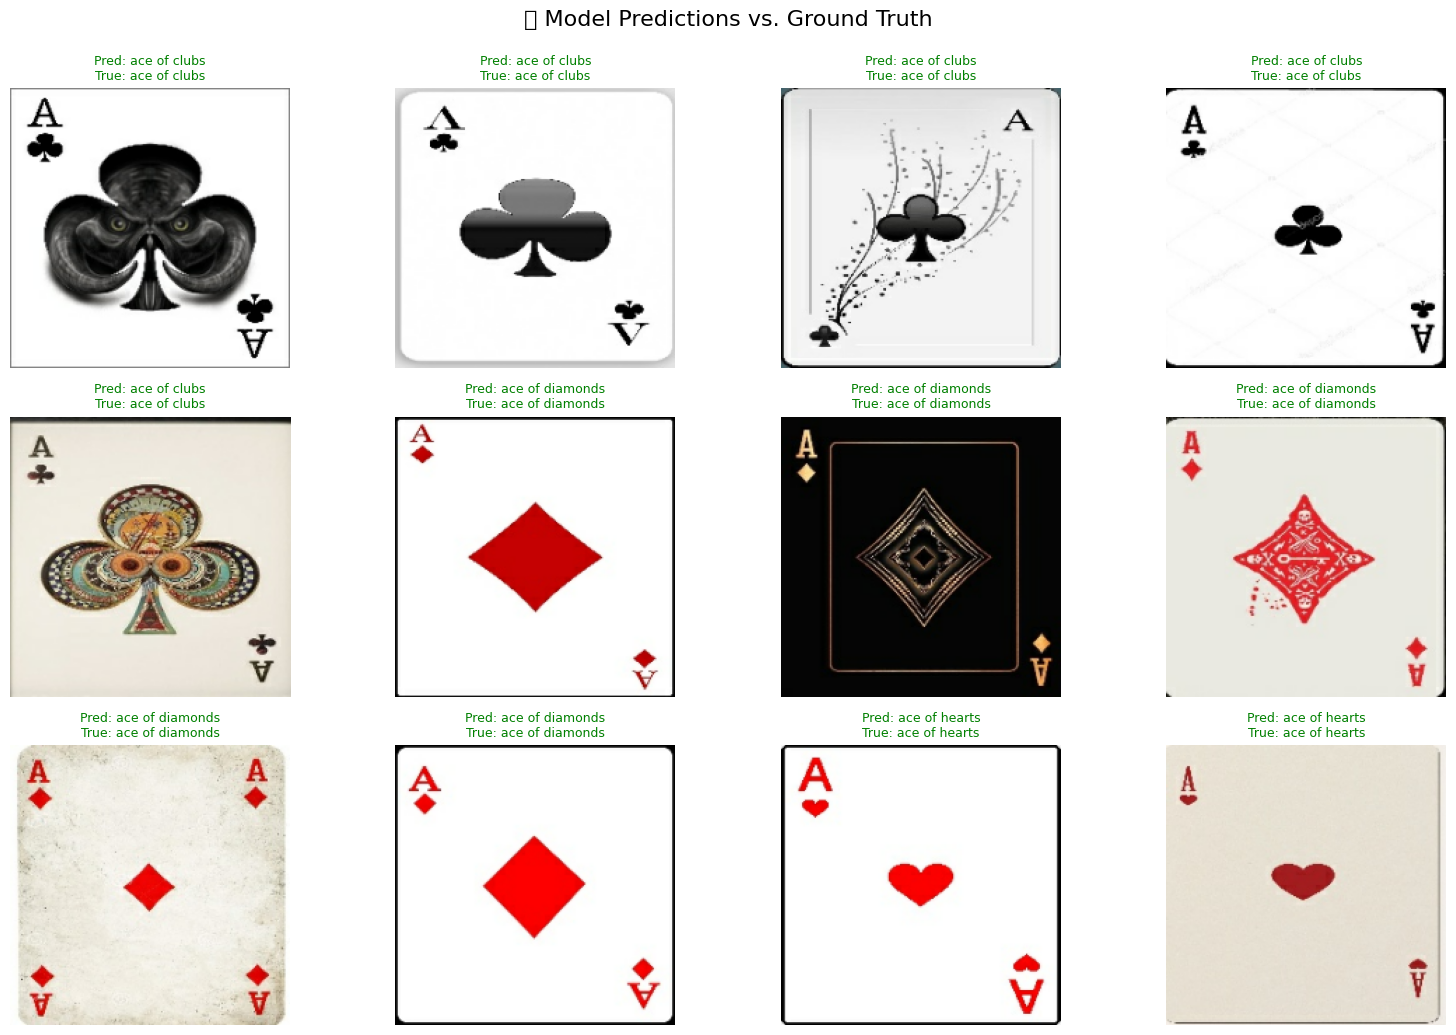

In [ ]:
# Take one batch from test set and visualize predictions
for images, labels in test_ds.take(1):
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)

    plt.figure(figsize=(16, 10))
    for i in range(12):  # Show 12 images
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        true_label = class_names[labels[i].numpy()]
        pred_label = class_names[predicted_labels[i]]
        color = "green" if pred_label == true_label else "red"

        plt.title(f"Pred: {pred_label}\nTrue: {true_label}", color=color, fontsize=9)
        plt.axis("off")

    plt.tight_layout()
    plt.suptitle("🎯 Model Predictions vs. Ground Truth", fontsize=16, y=1.03)
    plt.show()
    break